In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the data
df=pd.read_csv("~/Downloads/BikeSharing_training.csv")

# Show the first 5 lines
df.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,12,16,0,5,1,1,0.42,0.4242,0.47,0.1940,283
1,4,10,9,0,0,0,2,0.50,0.4848,0.55,0.4179,330
2,3,9,1,0,0,0,2,0.62,0.5606,0.88,0.0000,88
3,3,6,22,0,3,1,1,0.70,0.6364,0.42,0.1940,183
4,3,7,12,0,1,1,2,0.80,0.7424,0.52,0.1642,314


In [3]:
df_hist = df[['temp','atemp','hum','windspeed']]

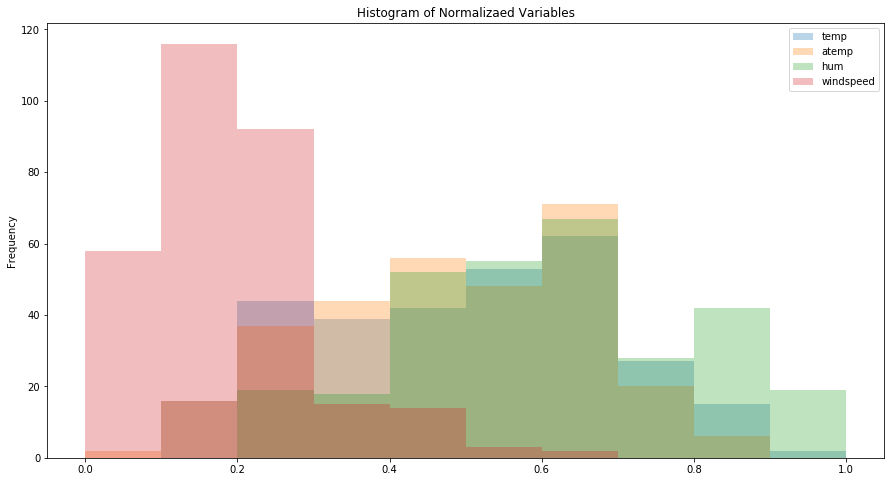

In [4]:
### WRITE CODE TO OBTAIN AND DISPLAY HISTOGRAMS ###
df_hist.plot(kind = 'hist', figsize=(15, 8),alpha = 0.3 )
plt.title('Histogram of Normalizaed Variables')
plt.show()

In [5]:
CorrMatrix = df.corr()
CorrMatrix

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000,0.795990,-0.046306,-0.057180,-0.049248,0.087355,0.097812,0.403317,0.406946,0.155086,-0.110663,0.225385
mnth,0.795990,1.000000,0.000608,-0.012655,0.001790,0.045749,0.098688,0.270690,0.265519,0.116613,-0.005633,0.144026
hr,-0.046306,0.000608,1.000000,0.104970,0.029337,-0.083801,-0.117088,0.049154,0.042834,-0.375612,0.162829,0.387503
holiday,-0.057180,-0.012655,0.104970,1.000000,-0.065359,-0.216498,-0.059273,0.023122,0.020936,-0.064204,-0.043506,0.018659
weekday,-0.049248,0.001790,0.029337,-0.065359,1.000000,0.096844,-0.088959,-0.057797,-0.071621,-0.098027,0.073404,0.067401
workingday,0.087355,0.045749,-0.083801,-0.216498,0.096844,1.000000,0.131374,-0.007330,-0.001266,0.168470,-0.000534,-0.072353
weathersit,0.097812,0.098688,-0.117088,-0.059273,-0.088959,0.131374,1.000000,-0.014367,-0.018496,0.403589,-0.047412,-0.167125
temp,0.403317,0.270690,0.049154,0.023122,-0.057797,-0.007330,-0.014367,1.000000,0.992783,-0.037122,-0.096506,0.435036
atemp,0.406946,0.265519,0.042834,0.020936,-0.071621,-0.001266,-0.018496,0.992783,1.000000,-0.017675,-0.126852,0.430083
hum,0.155086,0.116613,-0.375612,-0.064204,-0.098027,0.168470,0.403589,-0.037122,-0.017675,1.000000,-0.228720,-0.321508


In [9]:
from sklearn.preprocessing import OneHotEncoder
df_categorical = df[['season','mnth','hr','holiday','weekday','workingday','weathersit']]
enc = OneHotEncoder(drop = 'first')
ohe = enc.fit_transform(df_categorical).toarray()
ohe.shape

(300, 47)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
# Bulding and fitting the Linear Regression model 
y = df['cnt']
ohe = pd.DataFrame(ohe)
X = pd.concat([ohe,df_hist],axis = 1)
mul_reg = LinearRegression().fit(X,y)
yhat = mul_reg.predict(X)
# Evaluating the Linear Regression model by computing MSE on training set
from sklearn.metrics import mean_squared_error
mean_squared_error(y,yhat)

11558.180870399721

In [12]:
mul_reg.coef_

array([ 2.67150120e+01,  8.04911152e+00,  8.49753554e+01, -3.56586629e+01,
       -7.40844008e+00, -2.70814445e+01, -1.59492123e+01, -8.29971530e+00,
       -5.69350654e+01, -8.17283415e+01, -7.40206094e+01, -3.49488215e+01,
       -2.53874990e+01, -8.82403574e+01, -5.21468857e+01, -1.85955075e+01,
       -2.68985855e+01, -2.43335488e+00, -1.08303265e+01, -1.14737308e+01,
        1.45410561e+02,  3.20116418e+02,  1.45600348e+02,  5.14823727e+01,
        1.27067040e+02,  1.79743414e+02,  1.73792852e+02,  1.09048827e+02,
        1.41393854e+02,  2.18358188e+02,  3.89922558e+02,  3.33567971e+02,
        2.80207689e+02,  1.62593704e+02,  7.99015314e+01,  9.41702064e+01,
       -4.01809818e+00,  5.54668775e+15, -5.54668775e+15, -5.54668775e+15,
       -5.54668775e+15, -5.54668775e+15, -5.54668775e+15,  2.69789897e+01,
        5.54668775e+15, -1.51277423e+00, -1.12907656e+02,  9.34909669e+02,
       -6.67538766e+02, -6.55465448e+01, -1.34105129e+02])

In [13]:
from sklearn.metrics import r2_score

In [14]:
model_1 = LinearRegression().fit(df[['temp']],y)
y_1 = model_1.predict(df[['temp']])
r2_1 = r2_score(y,y_1)
r2_1

0.18925663564676132

In [15]:
model_2 = LinearRegression().fit(df[['temp','hum']],y)
y_2 = model_2.predict(df[['temp','hum']])
r2_2 = r2_score(y,y_2)
r2_2

0.2826295103178843

In [16]:
model_3 = LinearRegression().fit(df[['temp','hum','atemp']],y)
y_3 = model_3.predict(df[['temp','hum','atemp']])
r2_3 = r2_score(y,y_3)
r2_3

0.28380026219213783

In [17]:
df.shape

(300, 12)

In [18]:
n = 300

In [19]:
Adj_r2_1 = 1-(1-r2_1)*(n-1)/(n-1-1)
Adj_r2_1

0.18653602033013972

In [20]:
Adj_r2_2 = 1-(1-r2_2)*(n-1)/(n-2-1)
Adj_r2_2

0.2777987326095872

In [21]:
Adj_r2_3 = 1-(1-r2_3)*(n-1)/(n-3-1)
Adj_r2_3

0.27654148106570675

In [22]:
from sklearn.utils import shuffle

In [23]:
# Design a function to implement 5-fold cross-validation. 
# The input: training features X, training target y.
# The output: the average of MSE over the 5 folds.
def cross_val_mse(ind, dep):
    shuffled_X = shuffle(ind, random_state=0)
    X_folds = np.array_split(shuffled_X, 5) 
    shuffled_y = shuffle(dep, random_state=0)
    y_folds = np.array_split(shuffled_y, 5)
    MSE = 0
    for k in range(5):
        X_train = list(X_folds)
        X_test = pd.DataFrame(X_train.pop(k))
        X_train = np.concatenate(X_train)
        y_train = list(y_folds)
        y_test = y_train.pop(k)
        y_train = np.concatenate(y_train)
        reg = LinearRegression().fit(X_train,y_train)
        yhat = reg.predict(X_test)
        MSE += mean_squared_error(y_test,yhat)
    return(MSE/5)

In [24]:
cross_val_mse(X,y)

16288.661396737549

In [29]:
# Check the VIF for all variables to pre-select some before iterating them with models
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(df)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

# temp and atemp are showing collinearity. Will keep this observation in mind moving forward.

const         44.264035
season         3.288575
mnth           2.869932
hr             1.339969
holiday        1.072799
weekday        1.060562
workingday     1.103681
weathersit     1.234498
temp          77.309629
atemp         78.005367
hum            1.557557
windspeed      1.161076
cnt            1.616589
dtype: float64

In [30]:
# still include all the features to see which combination gives us the best mse
from itertools import combinations
all_combinations = []
for r in range(1,12):
    combinations_object = combinations(df.drop(['cnt'],axis = 1), r)
    combinations_list = list(combinations_object)
    all_combinations += combinations_list
len(all_combinations)

2047

In [31]:
cross_val_list = []
for columns in all_combinations:
    cvm = cross_val_mse(df[list(columns)],y)
    cross_val_list.append(tuple((cvm, columns)))

In [33]:
min(cross_val_list, key=lambda x:x[0])
# Here only atemp (but not temp) is included in the best model features. 
# So I will continue to use this combination to build our best-performing model.

(22966.10199334462, ('season', 'mnth', 'hr', 'atemp', 'hum'))

In [34]:
# read in the test data
df_test=pd.read_csv("~/Downloads/BikeSharing_Xtest.csv")

In [35]:
#transformation of test data
test_categorical = df_test[['season','mnth','hr']]
ohe_test = enc.fit_transform(test_categorical).toarray()
ohe_test = pd.DataFrame(ohe_test)
X_test = pd.concat([ohe_test,df_test[['atemp', 'hum']]],axis = 1)

In [37]:
ohe_final = enc.fit_transform(df[['season', 'mnth', 'hr']]).toarray()
ohe_final = pd.DataFrame(ohe_final)
X_final = pd.concat([ohe_final,df[['atemp', 'hum']]],axis = 1)
mul_reg_final = LinearRegression().fit(X_final,y)
yhat_final = mul_reg_final.predict(X_test)
yhat_final

array([ 251.50158504,  146.12185297,  409.95826375,  363.89750596,
        429.63651282,  137.85907357,   26.30390704,  214.1749234 ,
        148.92984648,   54.8789502 ,   26.53243543,  121.06094413,
        392.6871277 ,  148.39969385,   92.36898878,  230.92674438,
        313.36296131,  312.82803253,  318.32353686,  134.993198  ,
         32.21466219,  273.58853213,   24.04290315,  171.58676715,
        217.99986636,  -69.82801709,  163.2891201 ,  395.2733655 ,
        257.41710599,  200.27445513,  181.40244603,  441.82408469,
        -45.01285042,  -75.22566275,   21.83974356,   20.08629931,
        152.73764185,  234.74779826,  333.278273  ,   78.2580578 ,
        389.48705856,  474.87785332,   28.83186319,  437.03559466,
        248.38697538,  395.88243859,  149.8412269 ,  329.06419405,
        518.29439148,  292.14608164,  324.62661043,  288.4421728 ,
        239.77604694,   74.37495829,  192.98663014,  -19.05014418,
        345.48076291,  342.15393479,  -67.50311762, -109.64127